In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

scores = pd.read_csv("capstone_data.csv")
print(scores.head()) 

               Team_Name_Year  Domestic_Short  Domestic_Long  \
0           Skyliners_2017/18           64.59         106.96   
1         Haydenettes_2017/18           62.90          98.30   
2  Marigold_Ice_Unity_2017/18           71.08         121.18   
3         Team_Unique_2017/18           69.65         118.18   
4        Les_Supremes_2017/18             NaN            NaN   

   International_1_Short  International_1_Long  International_2_Short  \
0                  67.14                113.60                  64.66   
1                  62.75                116.18                  65.63   
2                  66.41                124.59                  73.06   
3                  71.60                114.97                  73.44   
4                  64.33                115.20                  66.70   

   International_2_Long  Nationals_Short  Nationals_Long  Worlds_Short  \
0                115.26            66.08          119.78         63.50   
1                120.20     

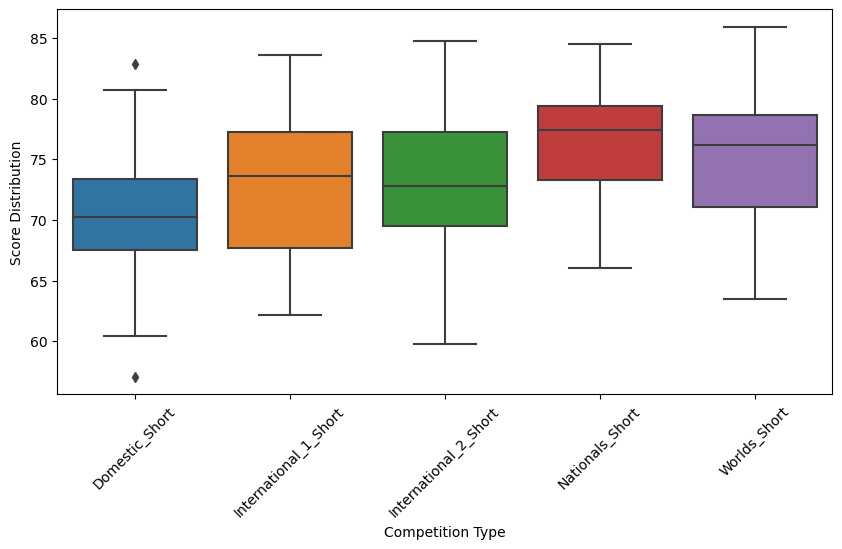

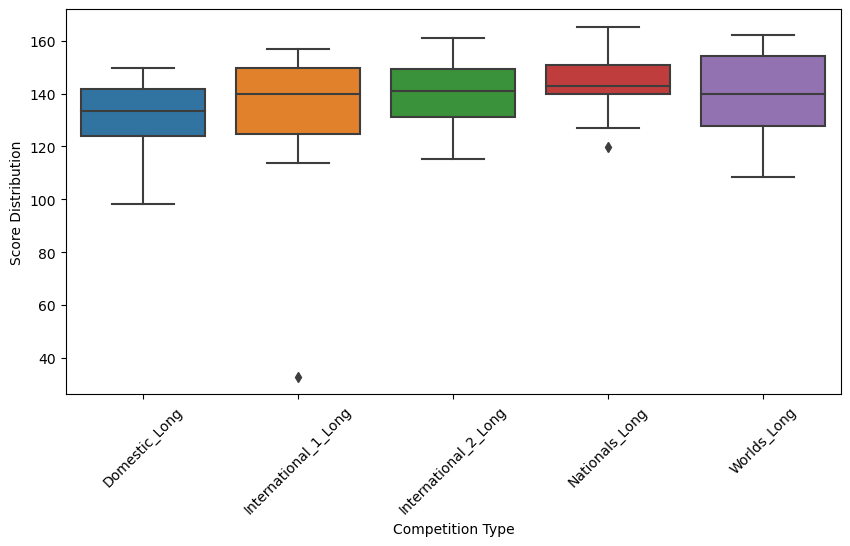

In [19]:
short_columns = ["Domestic_Short", "International_1_Short", "International_2_Short", "Nationals_Short", "Worlds_Short"]
long_columns = ["Domestic_Long", "International_1_Long", "International_2_Long", "Nationals_Long", "Worlds_Long"]

short = scores.melt(id_vars=["Team_Name_Year"], value_vars=short_columns, var_name="Competition Type", value_name="Score Distribution")
long = scores.melt(id_vars=["Team_Name_Year"], value_vars=long_columns, var_name="Competition Type", value_name="Score Distribution")

plt.figure(figsize=(10, 5))
sns.boxplot(x="Competition Type", y="Score Distribution", data=short)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="Competition Type", y="Score Distribution", data=long)
plt.xticks(rotation=45)
plt.show()


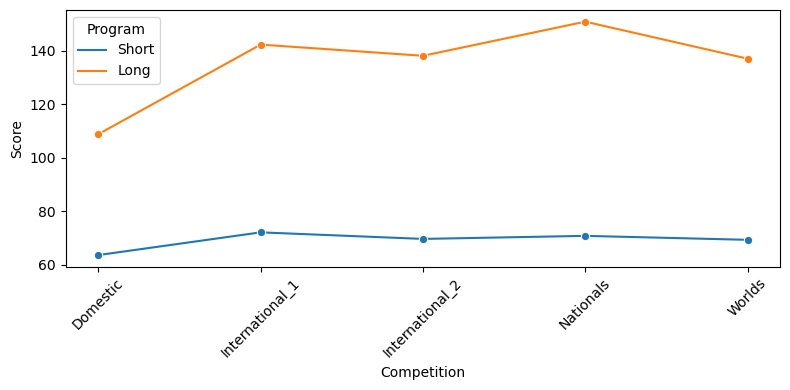

In [15]:
team_name = "Skyliners_2023/24"
def clean_competition_name(column_name):
    return column_name.replace("_Short", "").replace("_Long", "")

sky_23_24_short = scores[scores["Team_Name_Year"] == team_name].melt(
    id_vars=["Team_Name_Year"],
    value_vars=short_columns,
    var_name="Competition",
    value_name="Score"
)
sky_23_24_short["Program"] = "Short"
sky_23_24_short["Competition"] = sky_23_24_short["Competition"].apply(clean_competition_name)

sky_23_24_long = scores[scores["Team_Name_Year"] == team_name].melt(
    id_vars=["Team_Name_Year"],
    value_vars=long_columns,
    var_name="Competition",
    value_name="Score"
)
sky_23_24_long["Program"] = "Long"
sky_23_24_long["Competition"] = sky_23_24_long["Competition"].apply(clean_competition_name)

sky_23_24_all = pd.concat([sky_23_24_short, sky_23_24_long])

plt.figure(figsize=(8, 4))
sns.lineplot(data=sky_23_24_all, x="Competition", y="Score", hue="Program", marker="o")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

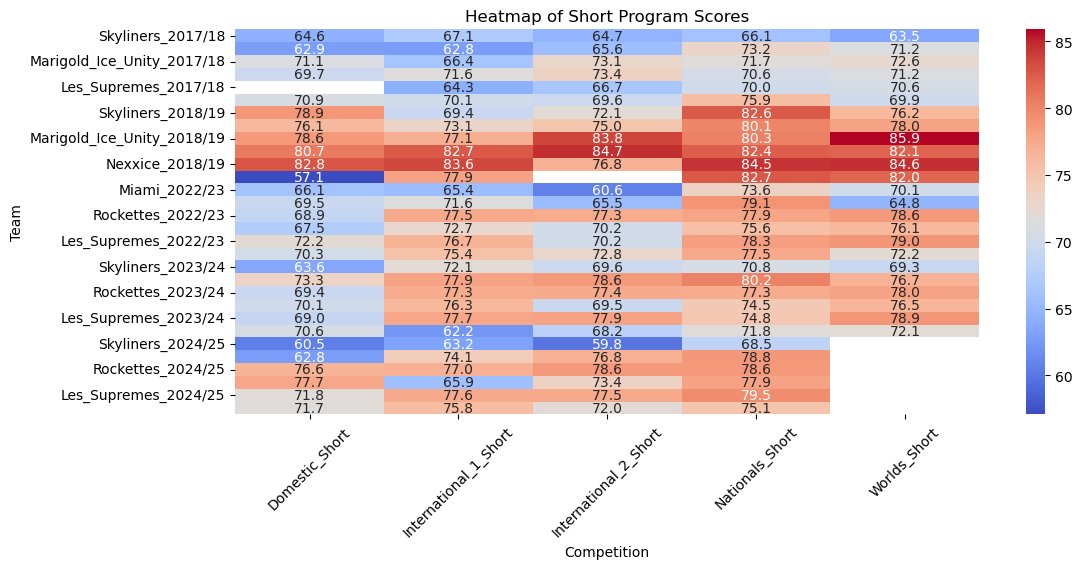

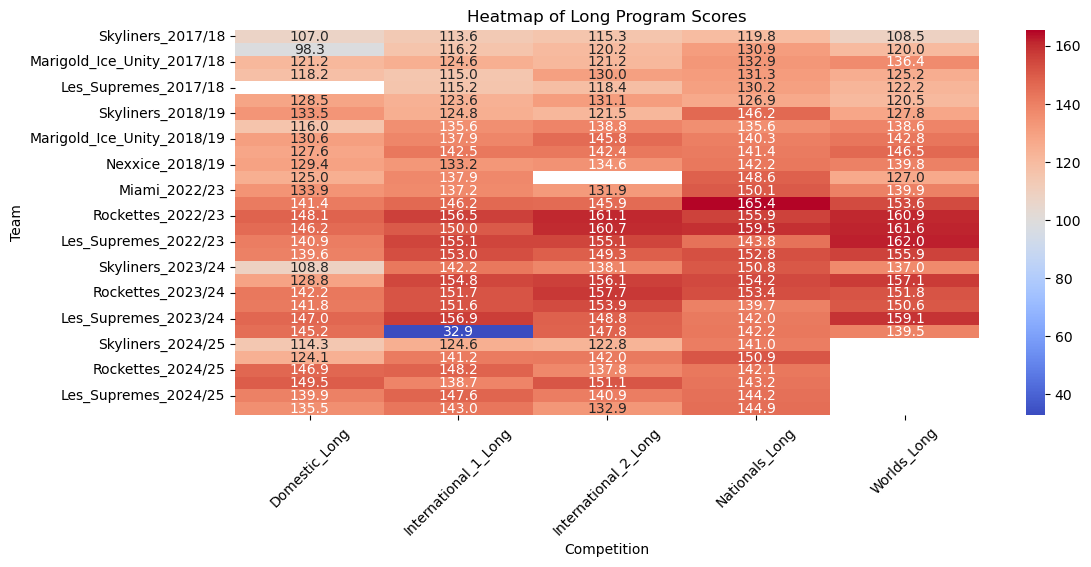

In [16]:
plt.figure(figsize=(12, 5))
sns.heatmap(scores.set_index("Team_Name_Year")[short_columns], cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Heatmap of Short Program Scores")
plt.xlabel("Competition")
plt.ylabel("Team")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 5))
sns.heatmap(scores.set_index("Team_Name_Year")[long_columns], cmap="coolwarm", annot=True, fmt=".1f")
plt.title("Heatmap of Long Program Scores")
plt.xlabel("Competition")
plt.ylabel("Team")
plt.xticks(rotation=45)
plt.show()

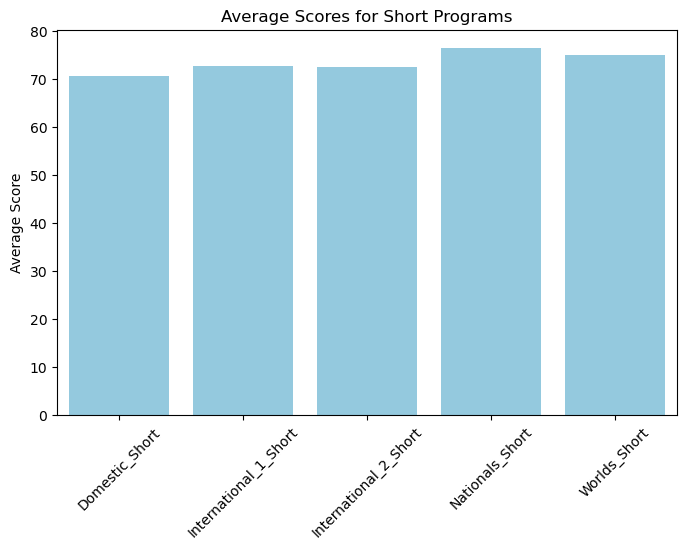

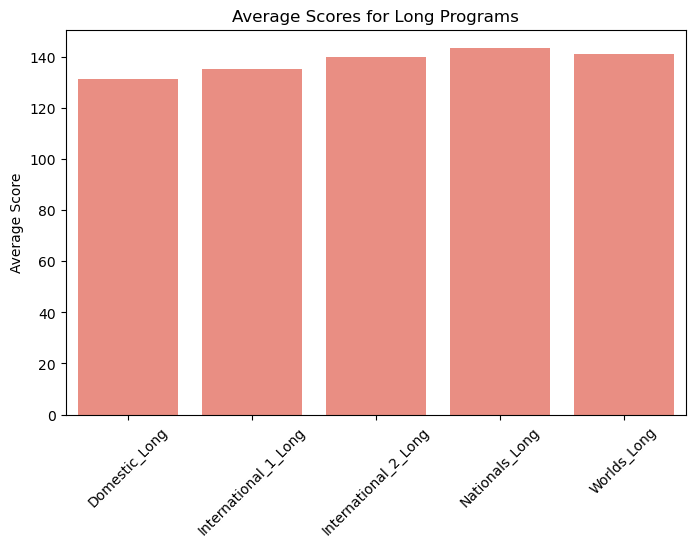

In [17]:
avg_short = scores[short_columns].mean()
avg_long = scores[long_columns].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_short.index, y=avg_short.values, color="skyblue")
plt.xticks(rotation=45)
plt.title("Average Scores for Short Programs")
plt.ylabel("Average Score")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_long.index, y=avg_long.values, color="salmon")
plt.xticks(rotation=45)
plt.title("Average Scores for Long Programs")
plt.ylabel("Average Score")
plt.show()

In [ ]:
import re

scores["Base_Team_Name"] = scores["Team_Name_Year"].astype(str).apply(lambda x: re.sub(r'_\d{4}/\d{2}', '', x) if x != "nan" else x)
team_country_map = {
    "Marigold_Ice_Unity": "Finland",
    "Rockettes": "Finland",
    "Team_Unique": "Finland",
    "Les_Supremes": "Canada",
    "Nexxice": "Canada",
    "Nova": "Canada",
    "Haydenettes": "USA",
    "Skyliners": "USA",
    "Miami": "USA",
}

scores["Country"] = scores["Base_Team_Name"].map(team_country_map)

scores_dropped = scores.dropna(subset=["Country"])
short_columns = ["Domestic_Short", "International_1_Short", "International_2_Short", "Nationals_Short", "Words_Short"]
long_columns = ["Domestic_Long", "International_1_Long", "International_2_Long", "Nationals_Long", "Worlds_Long"]
avg_short_by_country = scores_dropped.groupby("Country")[short_columns].mean()
avg_long_by_country = scores_dropped.groupby("Country")[long_columns].mean()

country_colors = {
    "Finland": "#17becf", 
    "Canada": "#d62728", 
    "USA": "#1f77b4"      
}
short_colors = [country_colors[country] for country in avg_short_by_country.index]
long_colors = [country_colors[country] for country in avg_long_by_country.index]

plt.figure(figsize=(8, 5))
avg_short_by_country.T.plot(kind="bar", figsize=(8, 5), color=short_colors)
plt.xticks(rotation=45)
plt.title("Average Short Program Scores by Country")
plt.ylabel("Average Score")
plt.legend(title="Country", loc="upper center", bbox_to_anchor=(0.5, -.35), ncol=3)
plt.show()

plt.figure(figsize=(8, 5))
avg_long_by_country.T.plot(kind="bar", figsize=(8, 5), color=long_colors)
plt.xticks(rotation=45)
plt.title("Average Long Program Scores by Country)")
plt.ylabel("Average Score")
plt.legend(title="Country", loc="upper center", bbox_to_anchor=(0.5, -.35), ncol=3)
plt.show()